In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

# Evolution Charts

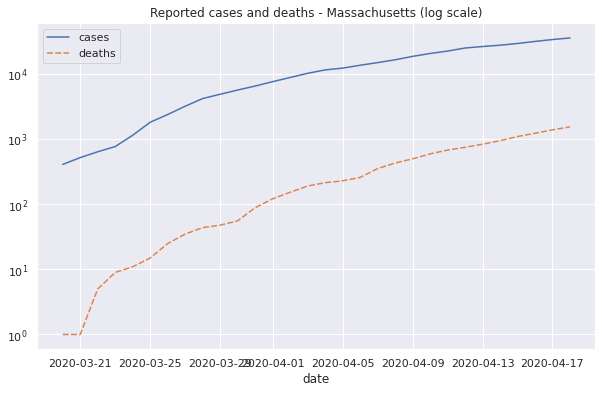

In [3]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

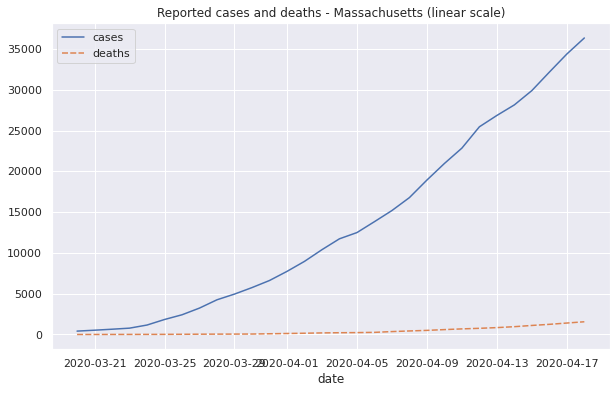

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

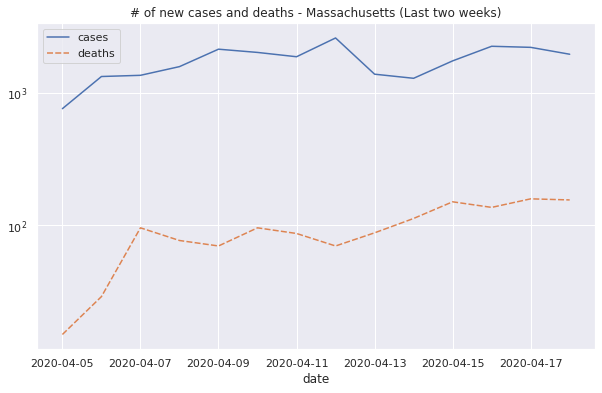

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df.diff().iloc[-14:])
ax.set_yscale("log")

plt.title("# of new cases and deaths - Massachusetts (Last two weeks)")

plt.show()

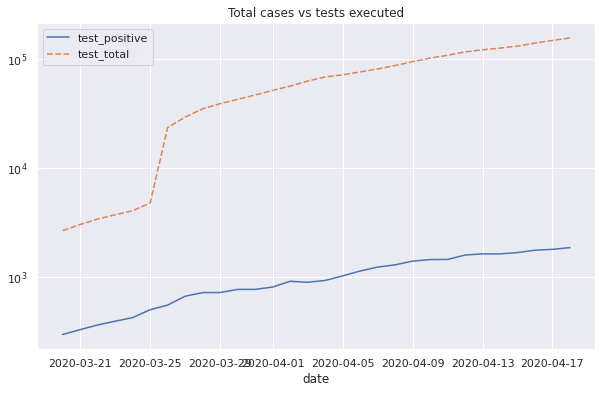

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

In [7]:
df[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-12,25475,756,1589,116730
2020-04-13,26867,844,1628,122049
2020-04-14,28163,957,1628,126551
2020-04-15,29918,1108,1674,132023
2020-04-16,32181,1245,1760,140773
2020-04-17,34402,1404,1793,148744
2020-04-18,36372,1560,1859,156806


In [8]:
df.pct_change().iloc[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-12,0.114392,0.102041,0.098134,0.073123
2020-04-13,0.054642,0.116402,0.024544,0.045567
2020-04-14,0.048238,0.133886,0.000000,0.036887
2020-04-15,0.062316,0.157785,0.028256,0.043239
2020-04-16,0.075640,0.123646,0.051374,0.066276
2020-04-17,0.069016,0.127711,0.018750,0.056623
2020-04-18,0.057264,0.111111,0.036810,0.054201
